Solving track reconstruction
=======================

Up until now, we have created tracks. However, tracks should fulfill some criteria in order to make sense from a physical standpoint: It wouldn't make sense to have several tracks coming from the same hits, or to join random hits together.

Typically one uses known geometrical constraints alongside problem-specific knowledge in order to determine where to look for tracks, and how should tracks look like. Ultimately, there are five quantities one has to look after:


*   Reconstruction Efficiency: The fraction of particles we have reconstructed.
    > \# correctly reconstructed / \# real tracks

*   Clone Tracks: Tracks that are similar to other correctly reconstructed tracks.
    > \# clone tracks / \# correctly reconstructed

*   Fake Tracks: Tracks that are incorrect, either created by noise hits or by incorrectly reconstructing a track.
    > \# incorrectly reconstructed / \# all reconstructed

*   Hit purity: Fraction of hits in a track that belong to the same MC particle.
    > \# track hits in MC particle hits / \# track hits
    
*   Hit efficiency: Number of hits correctly found out of the MC particle hits in a track.
    > \# track hits in MC particle hits / \# MC particle hits

Phew, that was quite a mouthful. If you want one thing to look for at the beginning, that is to *maximize reconstruction efficiency*. First try to reconstruct as much correct as possible, and work out the other indicators one by one.

Alongside the velopix tracking project there are a few algorithms we can try:

In [ ]:
# Run this if you didn't run it previously
!git clone https://github.com/dcampora/velopix_tracking.git

In [1]:
import sys, os
sys.path.append(os.getcwd() + "/../")
sys.path.append(os.getcwd() + "/velopix_tracking/")

import json
from event_model import event_model as em

f = open("velopix_tracking/events/velo_event_0.json")
json_data = json.loads(f.read())
event = em.event(json_data)
f.close()

Track following is a technique that reconstructs hits by visiting neighbouring modules. One first creates tracklets or *seeds* and posteriorly follows those tracks until no more hits are found.

<img src="velopix_tracking/doc/reco_example.png" alt="Track follow example" />

Included with the project is a track following implementation. Let's check it out.

In [2]:
from algorithms.track_following import track_following

# Instantiate track following
track_following = track_following()

# Solve the event
tracks = track_following.solve(event)

print("Found %i tracks with track following!" % len(tracks))

Instantiating track_following solver with parameters
 max slopes: (0.7, 0.7)
 max tolerance: (0.4, 0.4)
 max scatter: 0.4

Found 148 tracks with track following!


Track following found tracks, but are these the good tracks? For that, we will need to employ a validator:

In [3]:
from validator import validator_lite as vl
vl.validate_print([json_data], [tracks])

148 tracks including        8 ghosts (  5.4%). Event average   5.4%
              velo :      126 from      134 ( 94.0%,  94.0%)        3 clones (  2.38%), purity: ( 98.83%,  98.83%),  hitEff: ( 93.89%,  93.89%)
              long :       22 from       22 (100.0%, 100.0%)        1 clones (  4.55%), purity: ( 99.52%,  99.52%),  hitEff: ( 93.80%,  93.80%)
         long>5GeV :        8 from        8 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)


Results are shown for different track categories. Track categories are detector-specific, and refer to different types of tracks depending on the subdetectors they traverse, their energy, the particle decay where they originated from, direction, etc.

<img src="docs/track_types.png" alt="Track follow example" style="width: 600px" />

In the previous case, you can see some tracks are "velo" tracks or "long" tracks, which you can interpret from the image above.

Exercise 2
---------------

Let's first visualize what just happened.

* Use `print_event_2d` to print the event, and then print the event with the tracks found by `track_following`.

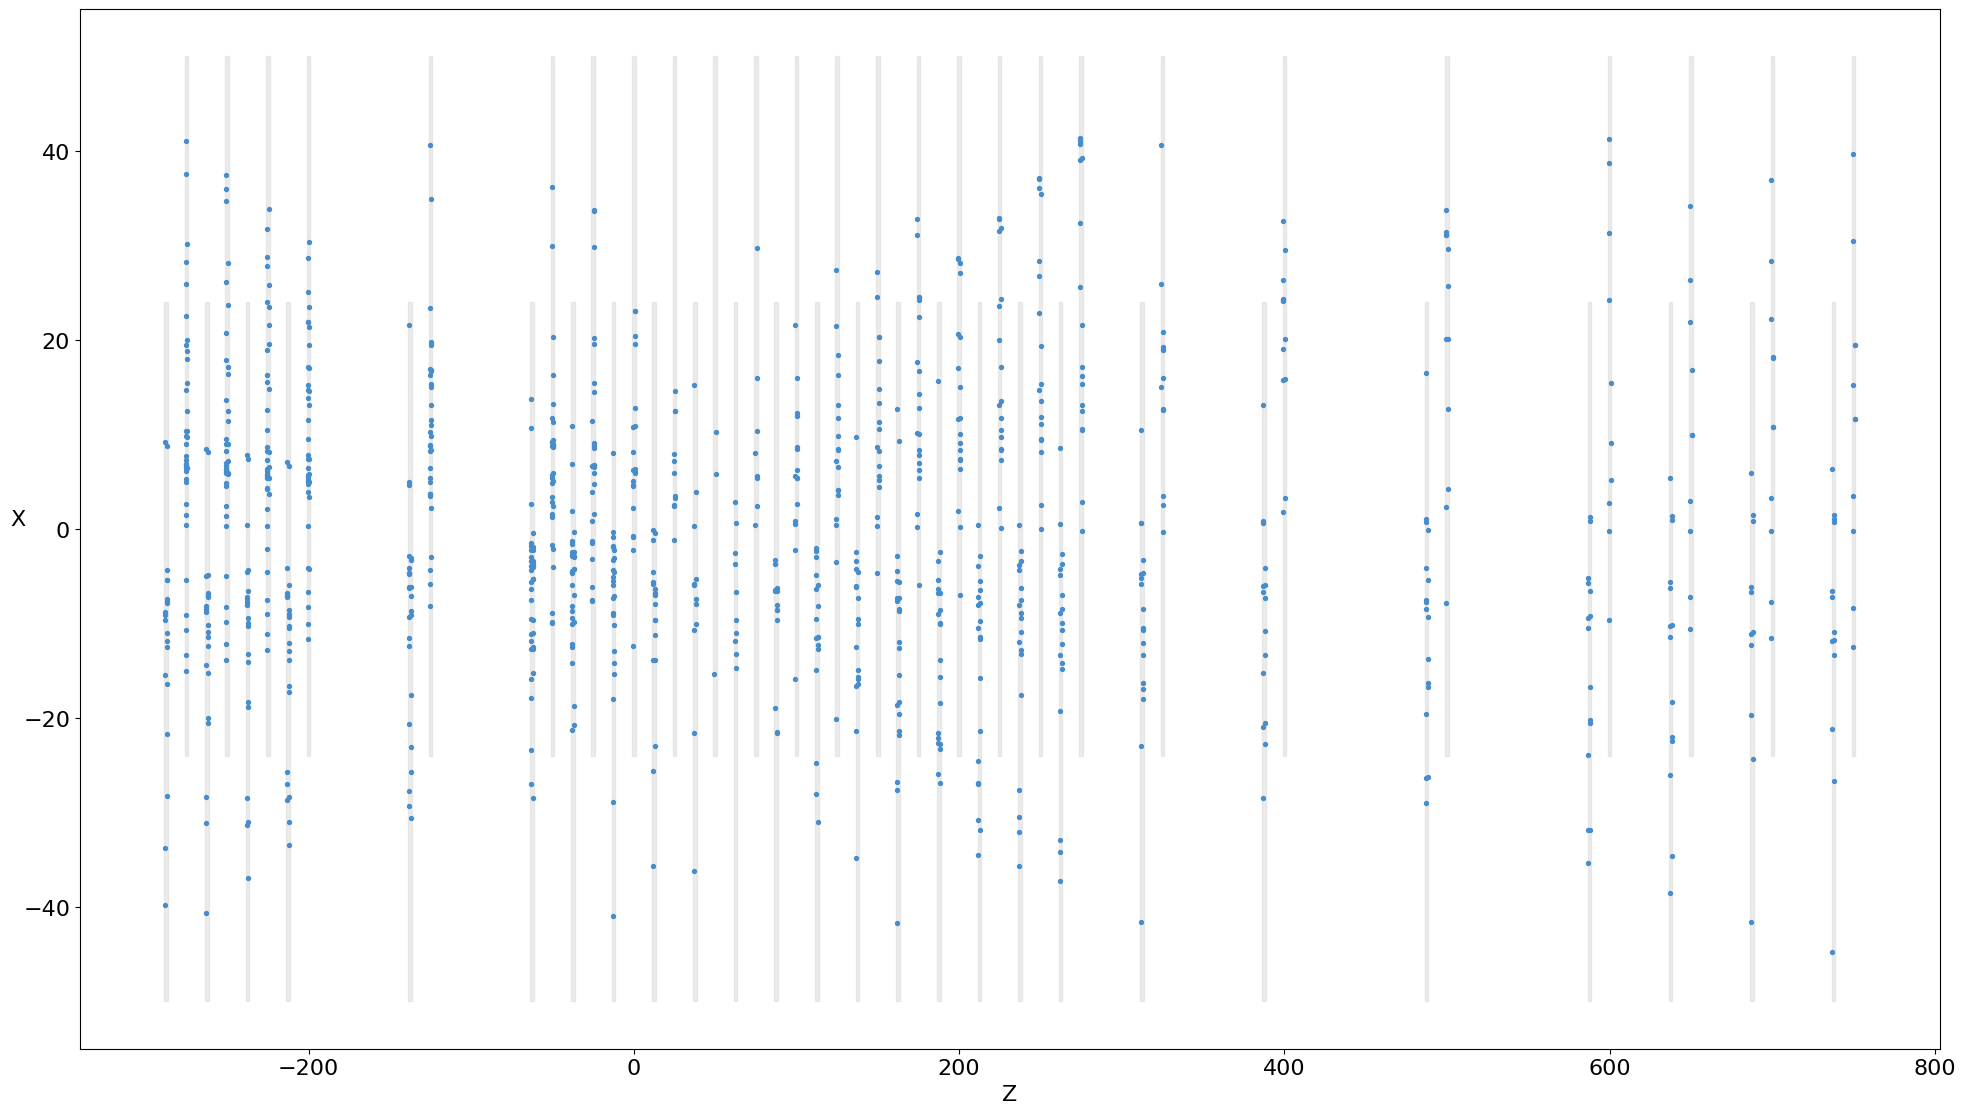

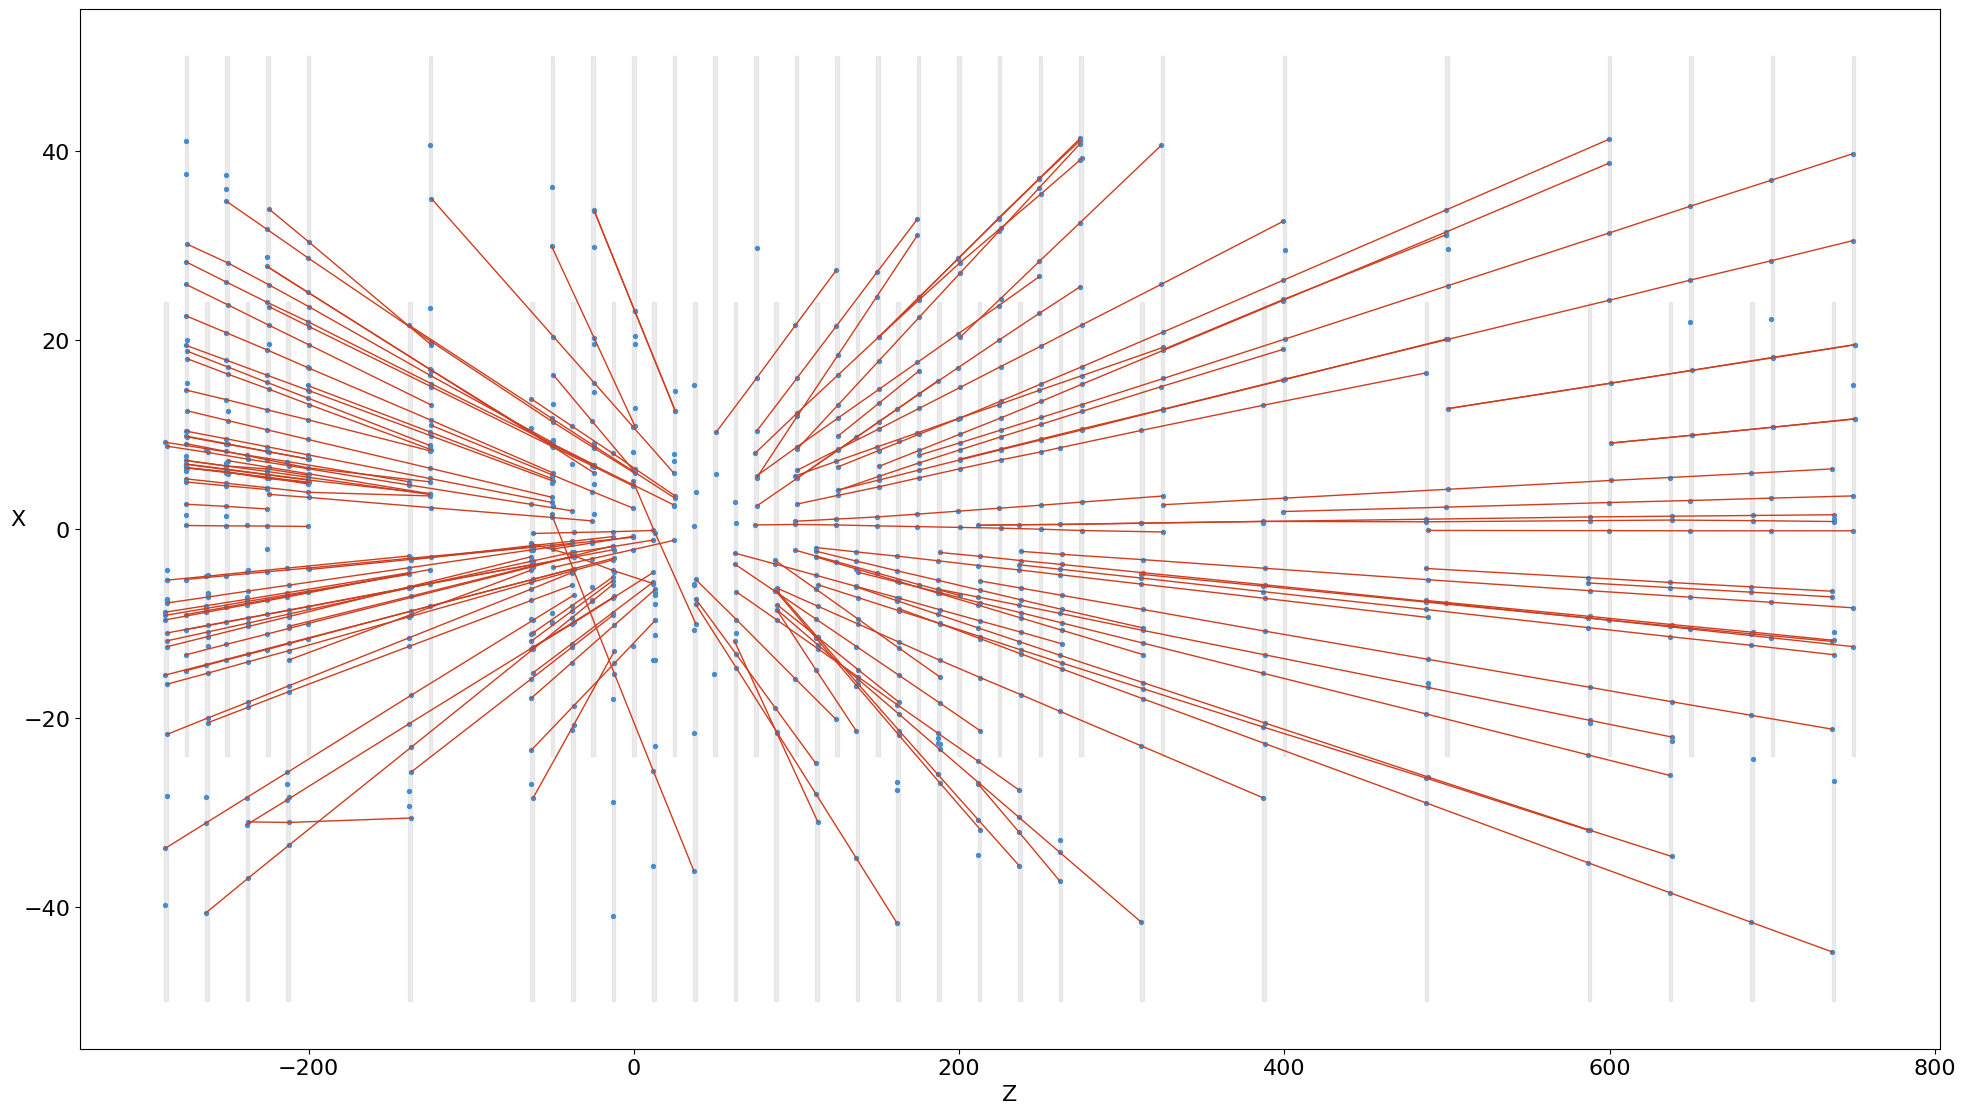

In [6]:
from visual.base import print_event_2d
%matplotlib inline

print_event_2d(event)
print_event_2d(event, tracks=tracks)

* The statistics we have are insufficient. Load iteratively all 10 events and run `track_following` on them. Finally, run the validator once with all the `json` data and all tracks. Do the numbers correspond with the previous ones?

148 tracks including        8 ghosts (  5.4%). Event average   5.4%
              velo :      126 from      134 ( 94.0%,  94.0%)        3 clones (  2.38%), purity: ( 98.83%,  98.83%),  hitEff: ( 93.89%,  93.89%)
              long :       22 from       22 (100.0%, 100.0%)        1 clones (  4.55%), purity: ( 99.52%,  99.52%),  hitEff: ( 93.80%,  93.80%)
         long>5GeV :        8 from        8 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)


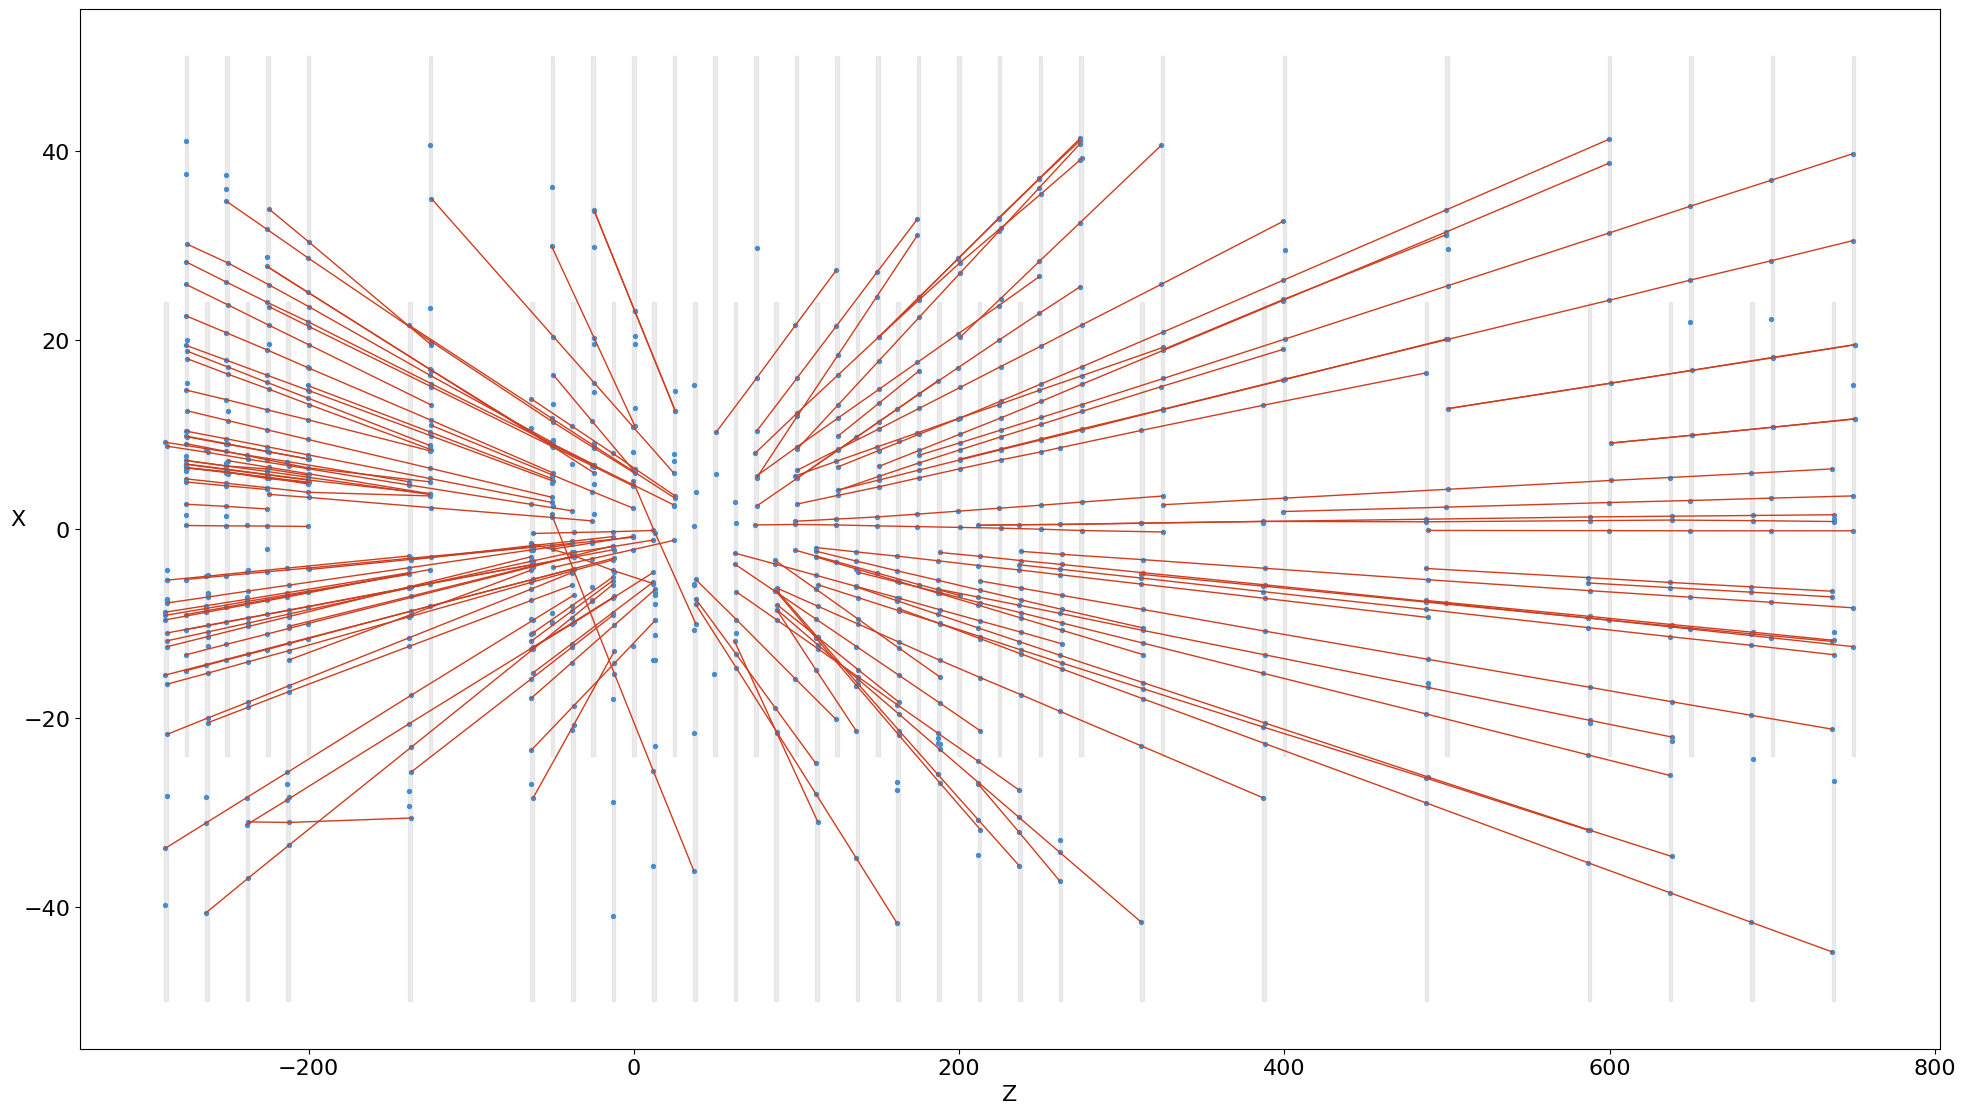

345 tracks including       28 ghosts (  8.1%). Event average   8.1%
              velo :      281 from      295 ( 95.3%,  95.3%)        5 clones (  1.78%), purity: ( 98.57%,  98.57%),  hitEff: ( 94.97%,  94.97%)
              long :       86 from       86 (100.0%, 100.0%)        4 clones (  4.65%), purity: ( 98.24%,  98.24%),  hitEff: ( 93.40%,  93.40%)
         long>5GeV :       62 from       62 (100.0%, 100.0%)        3 clones (  4.84%), purity: ( 98.38%,  98.38%),  hitEff: ( 92.82%,  92.82%)
      long_strange :        5 from        5 (100.0%, 100.0%)        0 clones (  0.00%), purity: ( 98.00%,  98.00%),  hitEff: ( 93.00%,  93.00%)
 long_strange>5GeV :        3 from        3 (100.0%, 100.0%)        0 clones (  0.00%), purity: ( 96.67%,  96.67%),  hitEff: ( 88.33%,  88.33%)


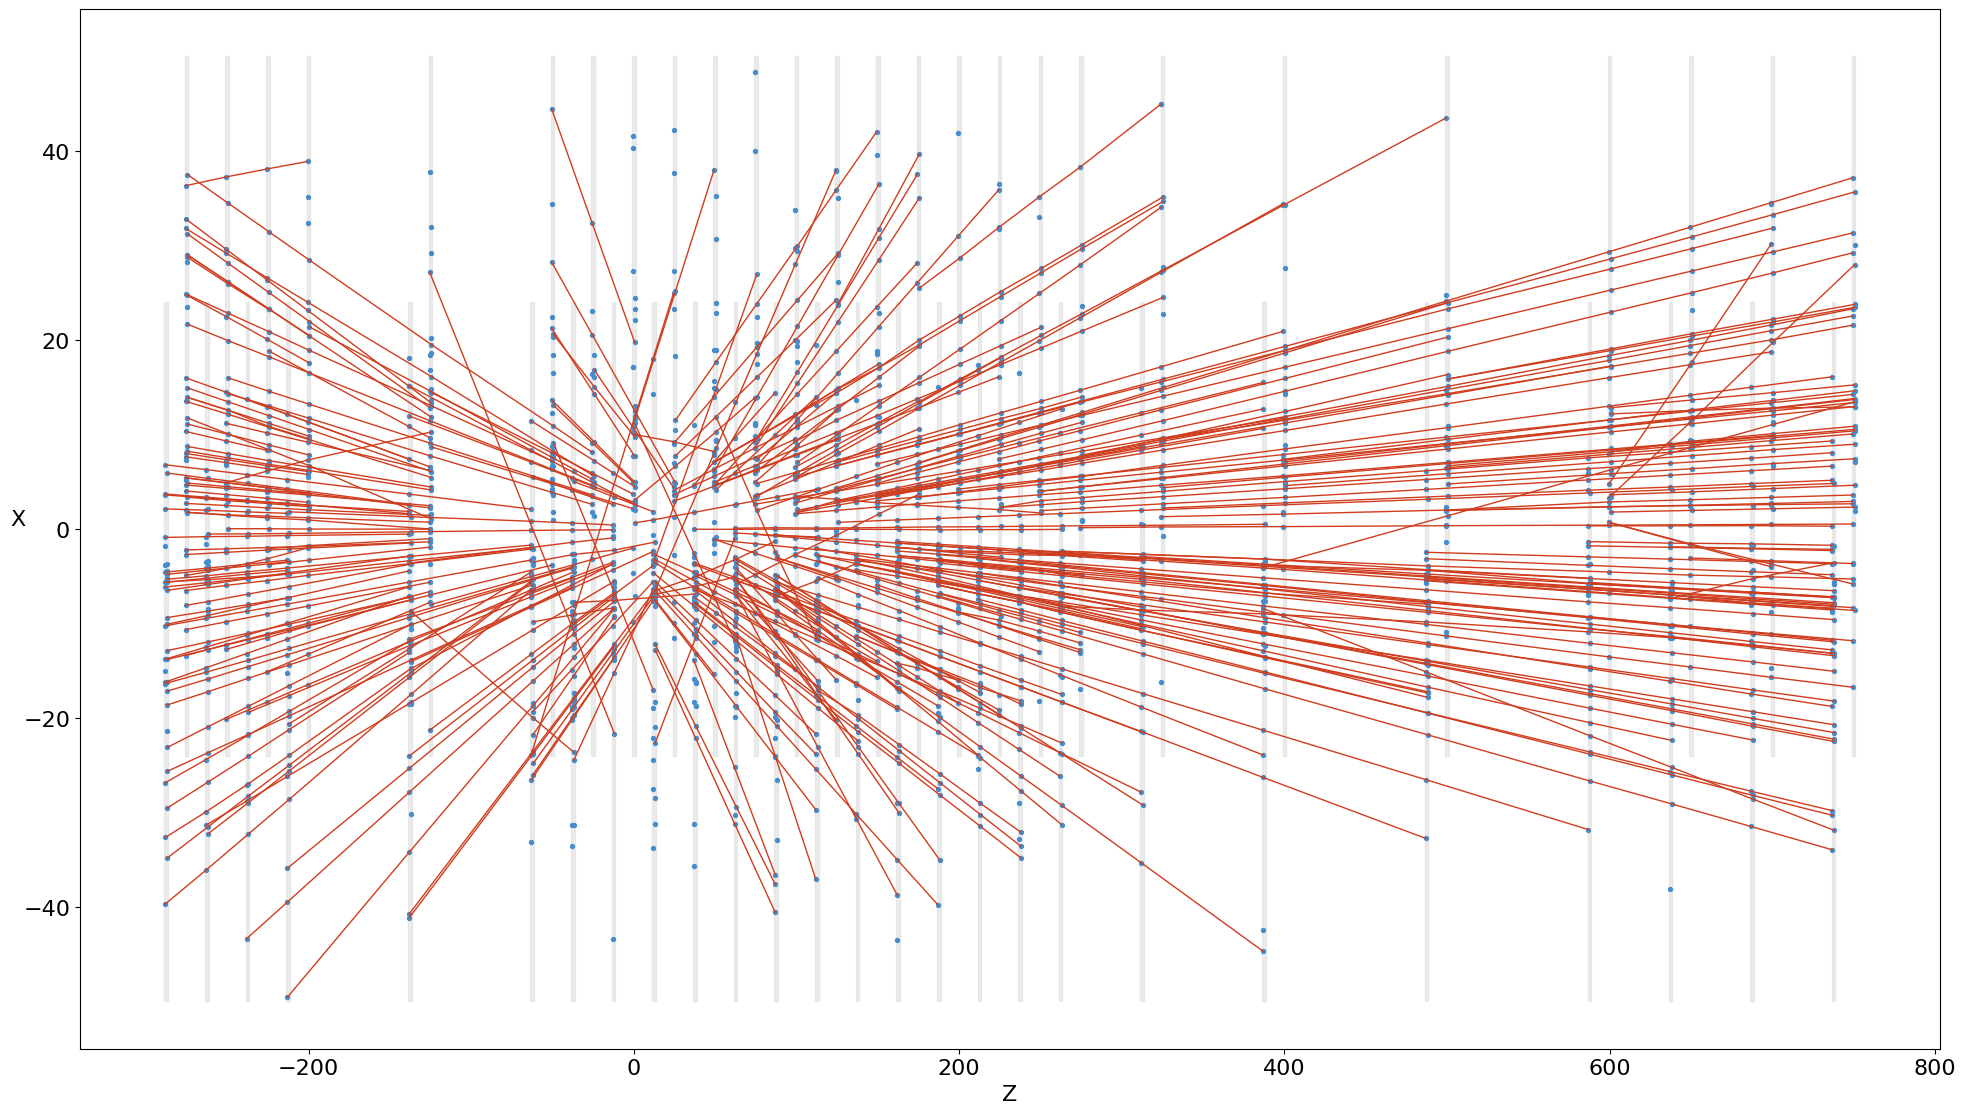

13 tracks including        1 ghosts (  7.7%). Event average   7.7%
              velo :       12 from       12 (100.0%, 100.0%)        0 clones (  0.00%), purity: ( 97.69%,  97.69%),  hitEff: ( 97.29%,  97.29%)
              long :        7 from        7 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
         long>5GeV :        4 from        4 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
Plot not possible
459 tracks including       53 ghosts ( 11.5%). Event average  11.5%
              velo :      363 from      401 ( 90.5%,  90.5%)        7 clones (  1.93%), purity: ( 97.43%,  97.43%),  hitEff: ( 95.00%,  95.00%)
              long :       98 from      101 ( 97.0%,  97.0%)        3 clones (  3.06%), purity: ( 97.72%,  97.72%),  hitEff: ( 94.57%,  94.57%)
         long>5GeV :       56 from       57 ( 98.2%,  98.2%)        3 clones (  5.36%), purity: ( 97.34%,  97.34%),  hitEff: ( 

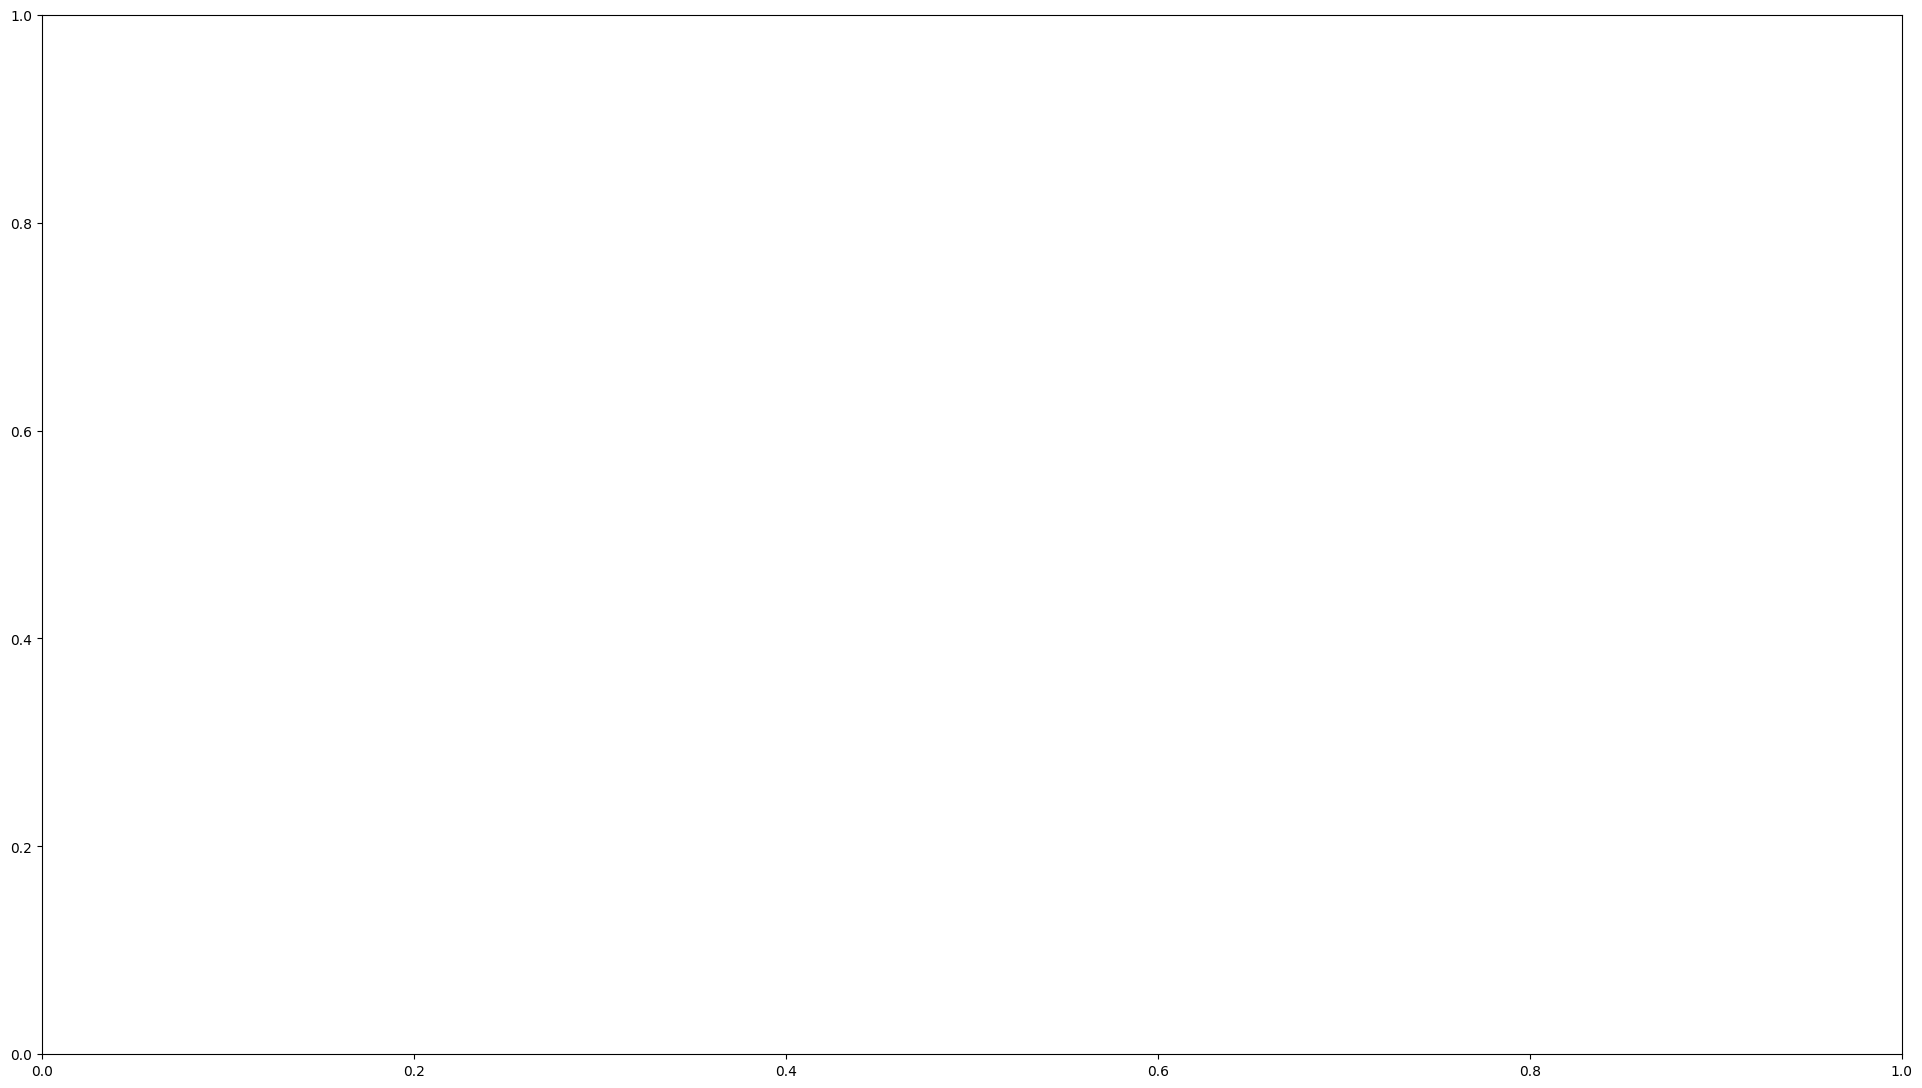

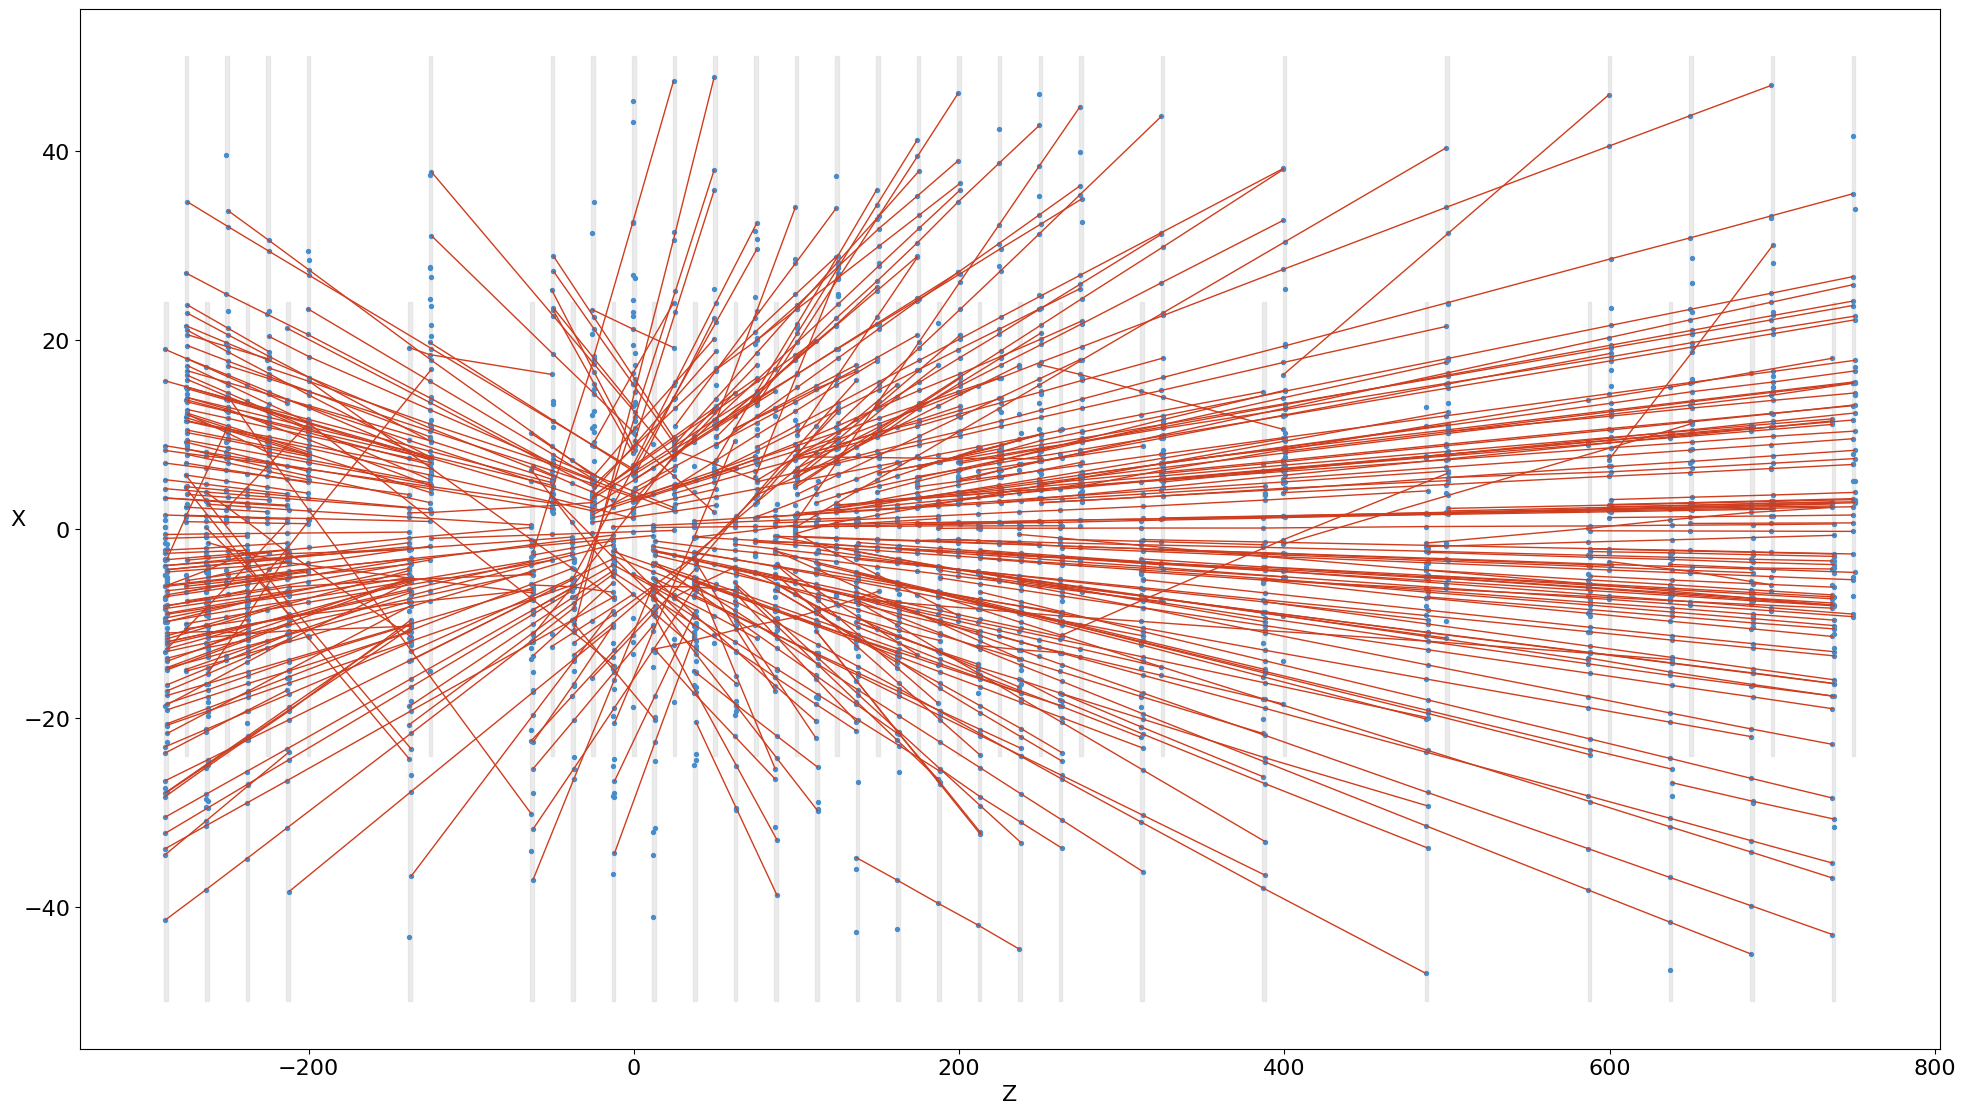

302 tracks including       27 ghosts (  8.9%). Event average   8.9%
              velo :      247 from      269 ( 91.8%,  91.8%)        6 clones (  2.43%), purity: ( 98.74%,  98.74%),  hitEff: ( 95.87%,  95.87%)
              long :       67 from       70 ( 95.7%,  95.7%)        4 clones (  5.97%), purity: ( 98.30%,  98.30%),  hitEff: ( 94.61%,  94.61%)
         long>5GeV :       43 from       45 ( 95.6%,  95.6%)        2 clones (  4.65%), purity: ( 98.32%,  98.32%),  hitEff: ( 98.22%,  98.22%)
      long_strange :        1 from        2 ( 50.0%,  50.0%)        0 clones (  0.00%), purity: ( 87.50%,  87.50%),  hitEff: ( 77.78%,  77.78%)


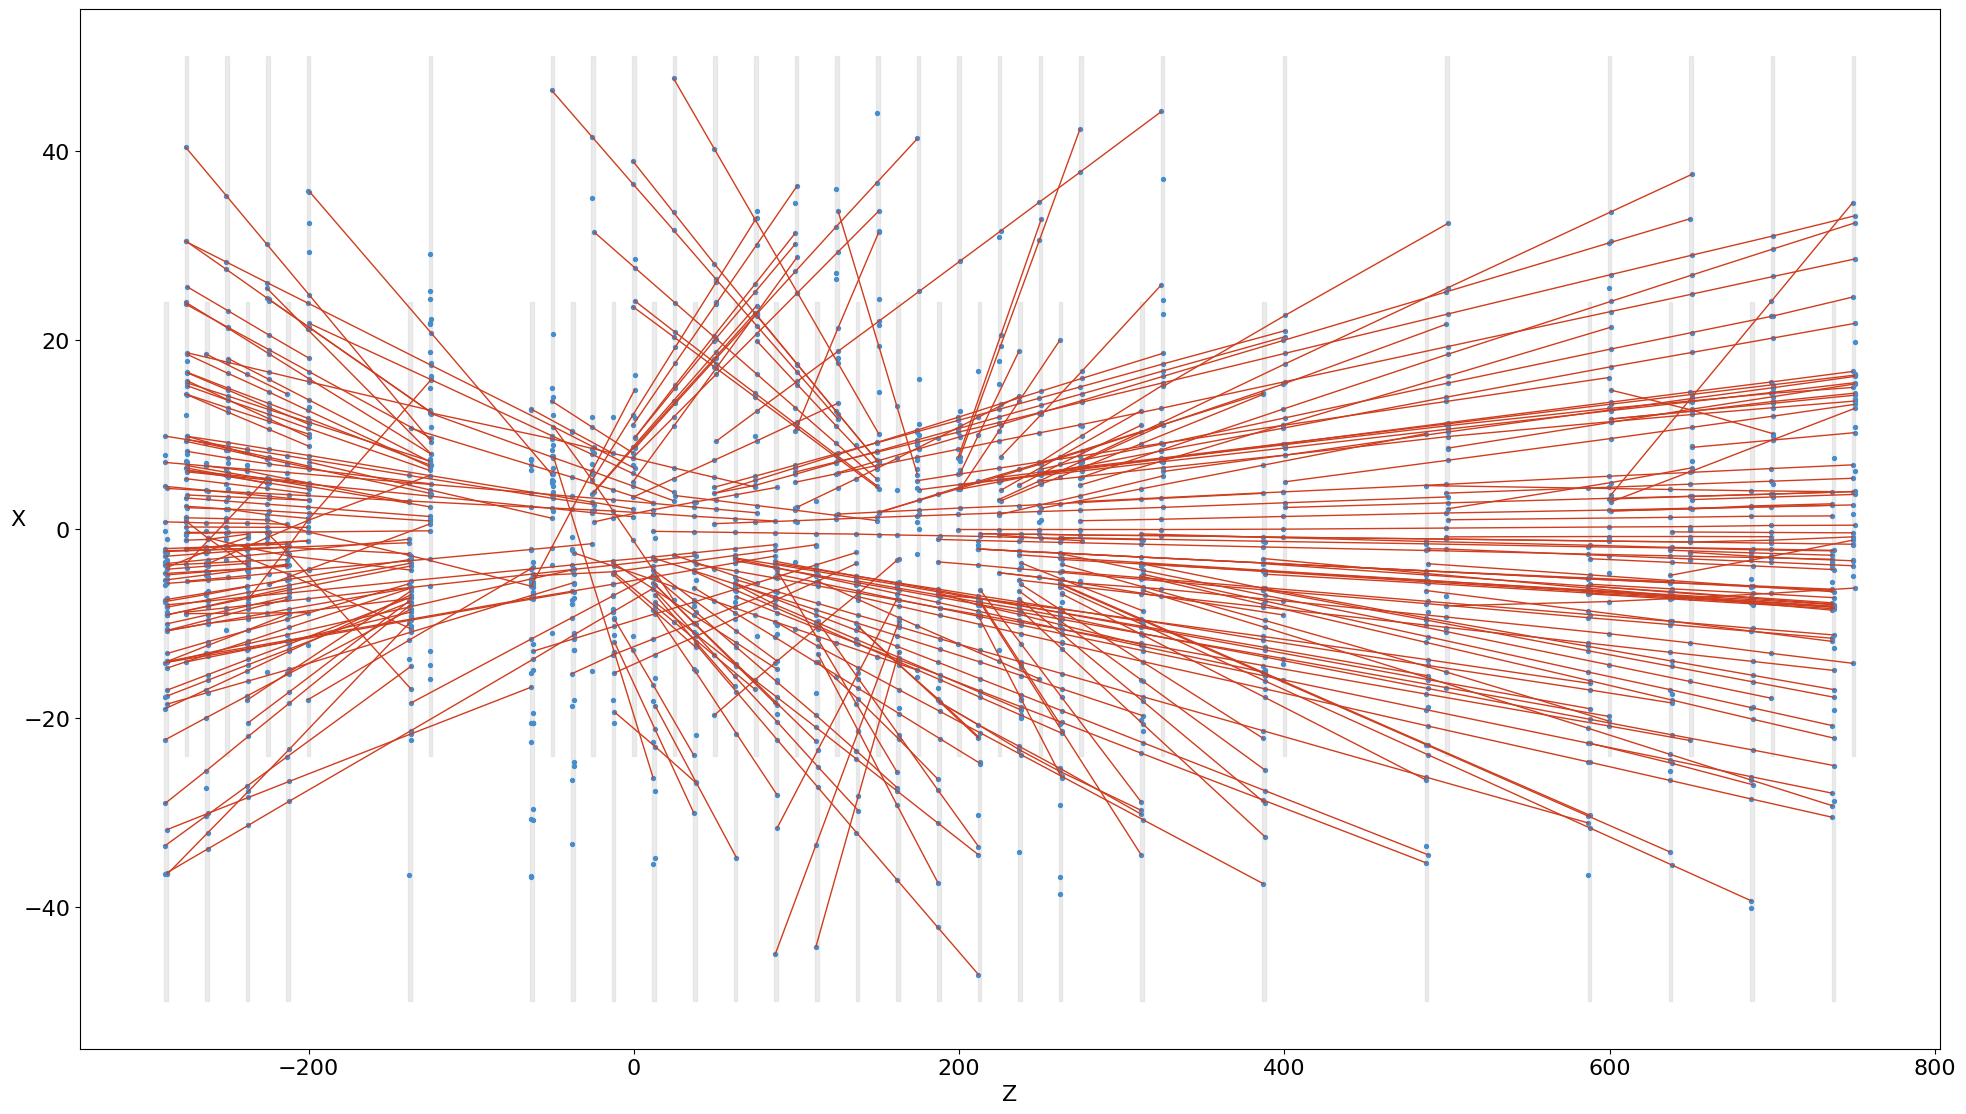

446 tracks including       60 ghosts ( 13.5%). Event average  13.5%
              velo :      348 from      393 ( 88.5%,  88.5%)        9 clones (  2.59%), purity: ( 97.57%,  97.84%),  hitEff: ( 94.53%,  94.53%)
              long :      124 from      128 ( 96.9%,  96.9%)        2 clones (  1.61%), purity: ( 98.48%,  98.48%),  hitEff: ( 96.22%,  96.22%)
         long>5GeV :       76 from       80 ( 95.0%,  95.0%)        2 clones (  2.63%), purity: ( 97.71%,  97.71%),  hitEff: ( 94.36%,  94.36%)
      long_strange :        6 from        7 ( 85.7%,  85.7%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
 long_strange>5GeV :        4 from        5 ( 80.0%,  80.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)


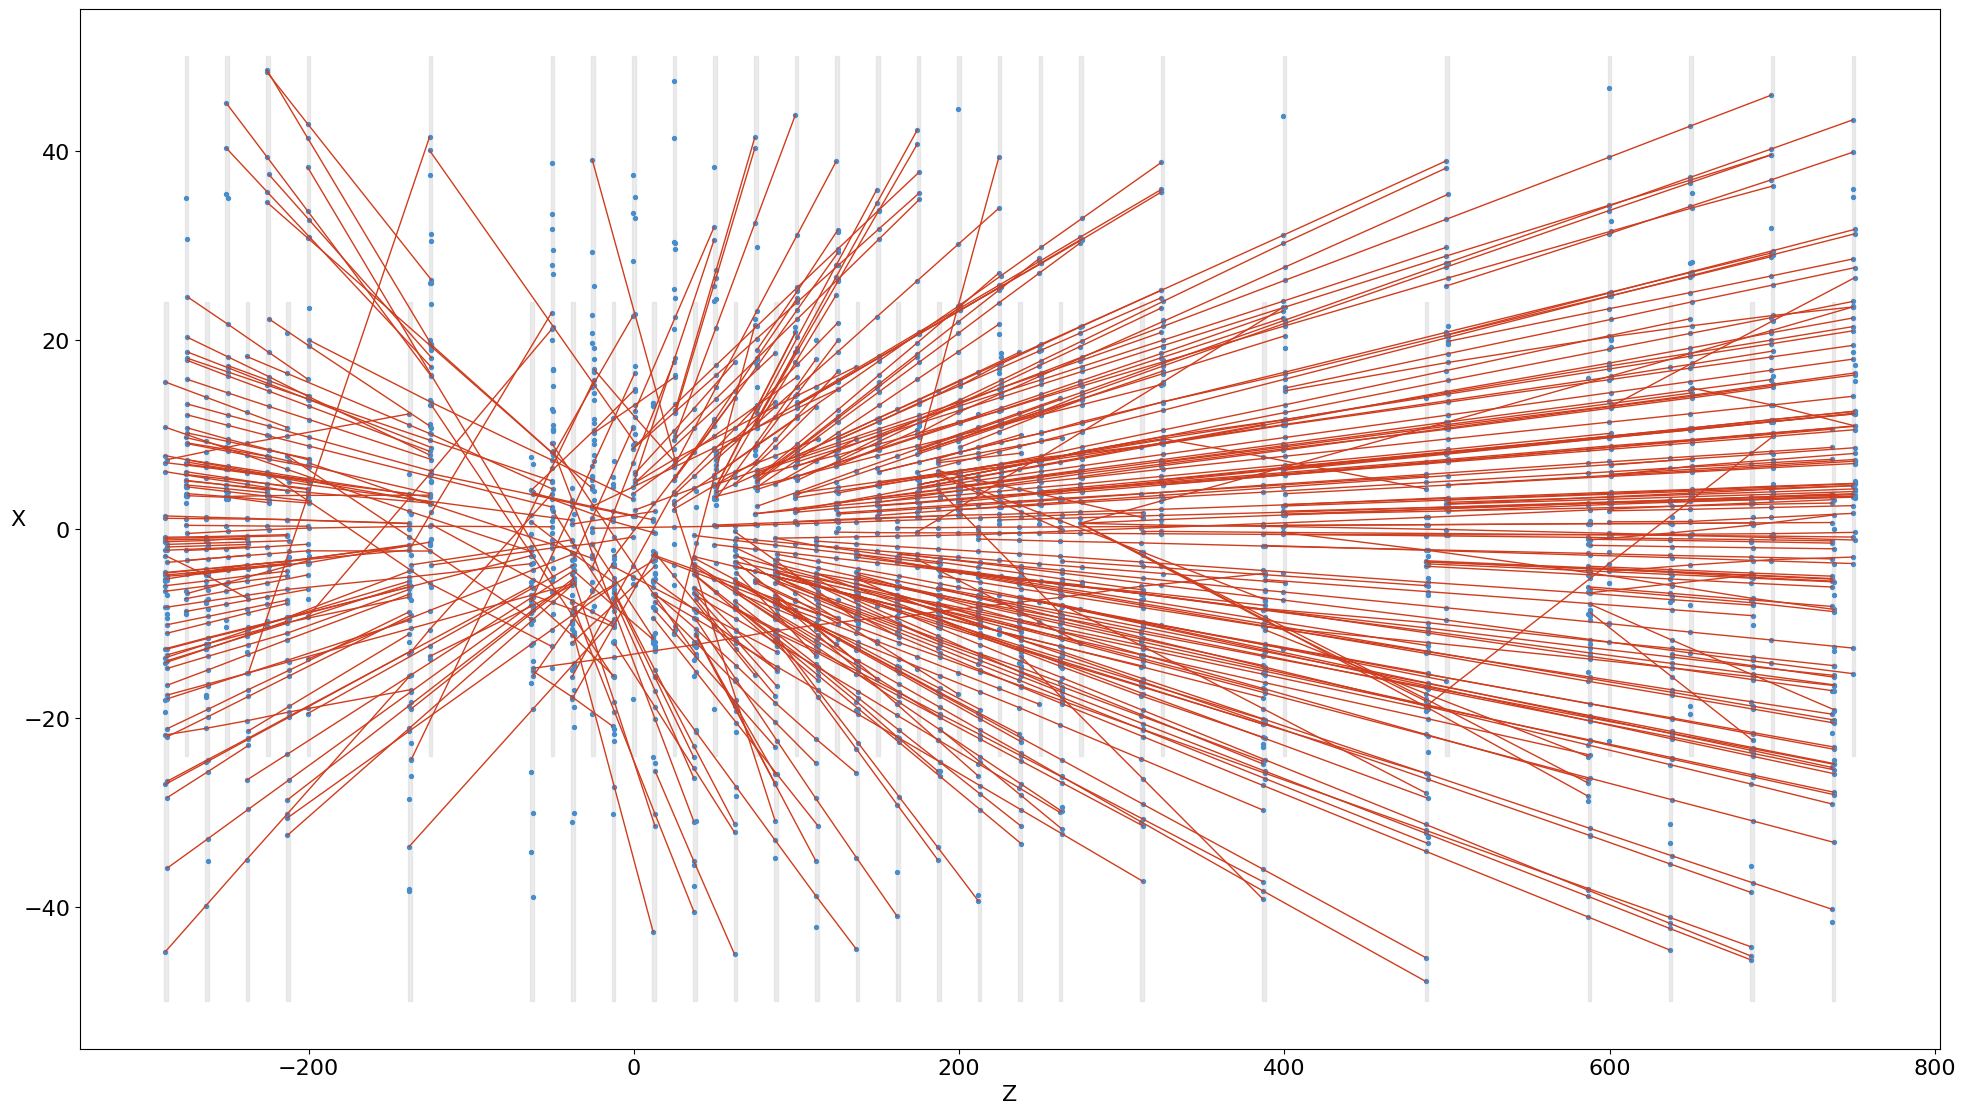

387 tracks including       32 ghosts (  8.3%). Event average   8.3%
              velo :      296 from      314 ( 94.3%,  94.3%)        5 clones (  1.69%), purity: ( 98.24%,  98.24%),  hitEff: ( 95.27%,  95.27%)
              long :       89 from       91 ( 97.8%,  97.8%)        4 clones (  4.49%), purity: ( 98.14%,  98.14%),  hitEff: ( 92.80%,  92.80%)
         long>5GeV :       53 from       55 ( 96.4%,  96.4%)        4 clones (  7.55%), purity: ( 97.80%,  97.80%),  hitEff: ( 89.54%,  89.54%)
      long_strange :        3 from        3 (100.0%, 100.0%)        0 clones (  0.00%), purity: ( 98.25%,  98.25%),  hitEff: ( 95.24%,  95.24%)
 long_strange>5GeV :        1 from        1 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: ( 85.71%,  85.71%)
        long_fromb :        5 from        5 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: ( 97.14%,  97.14%)
   long_fromb>5GeV :        3 from        3 (100.0%, 100.0%)        

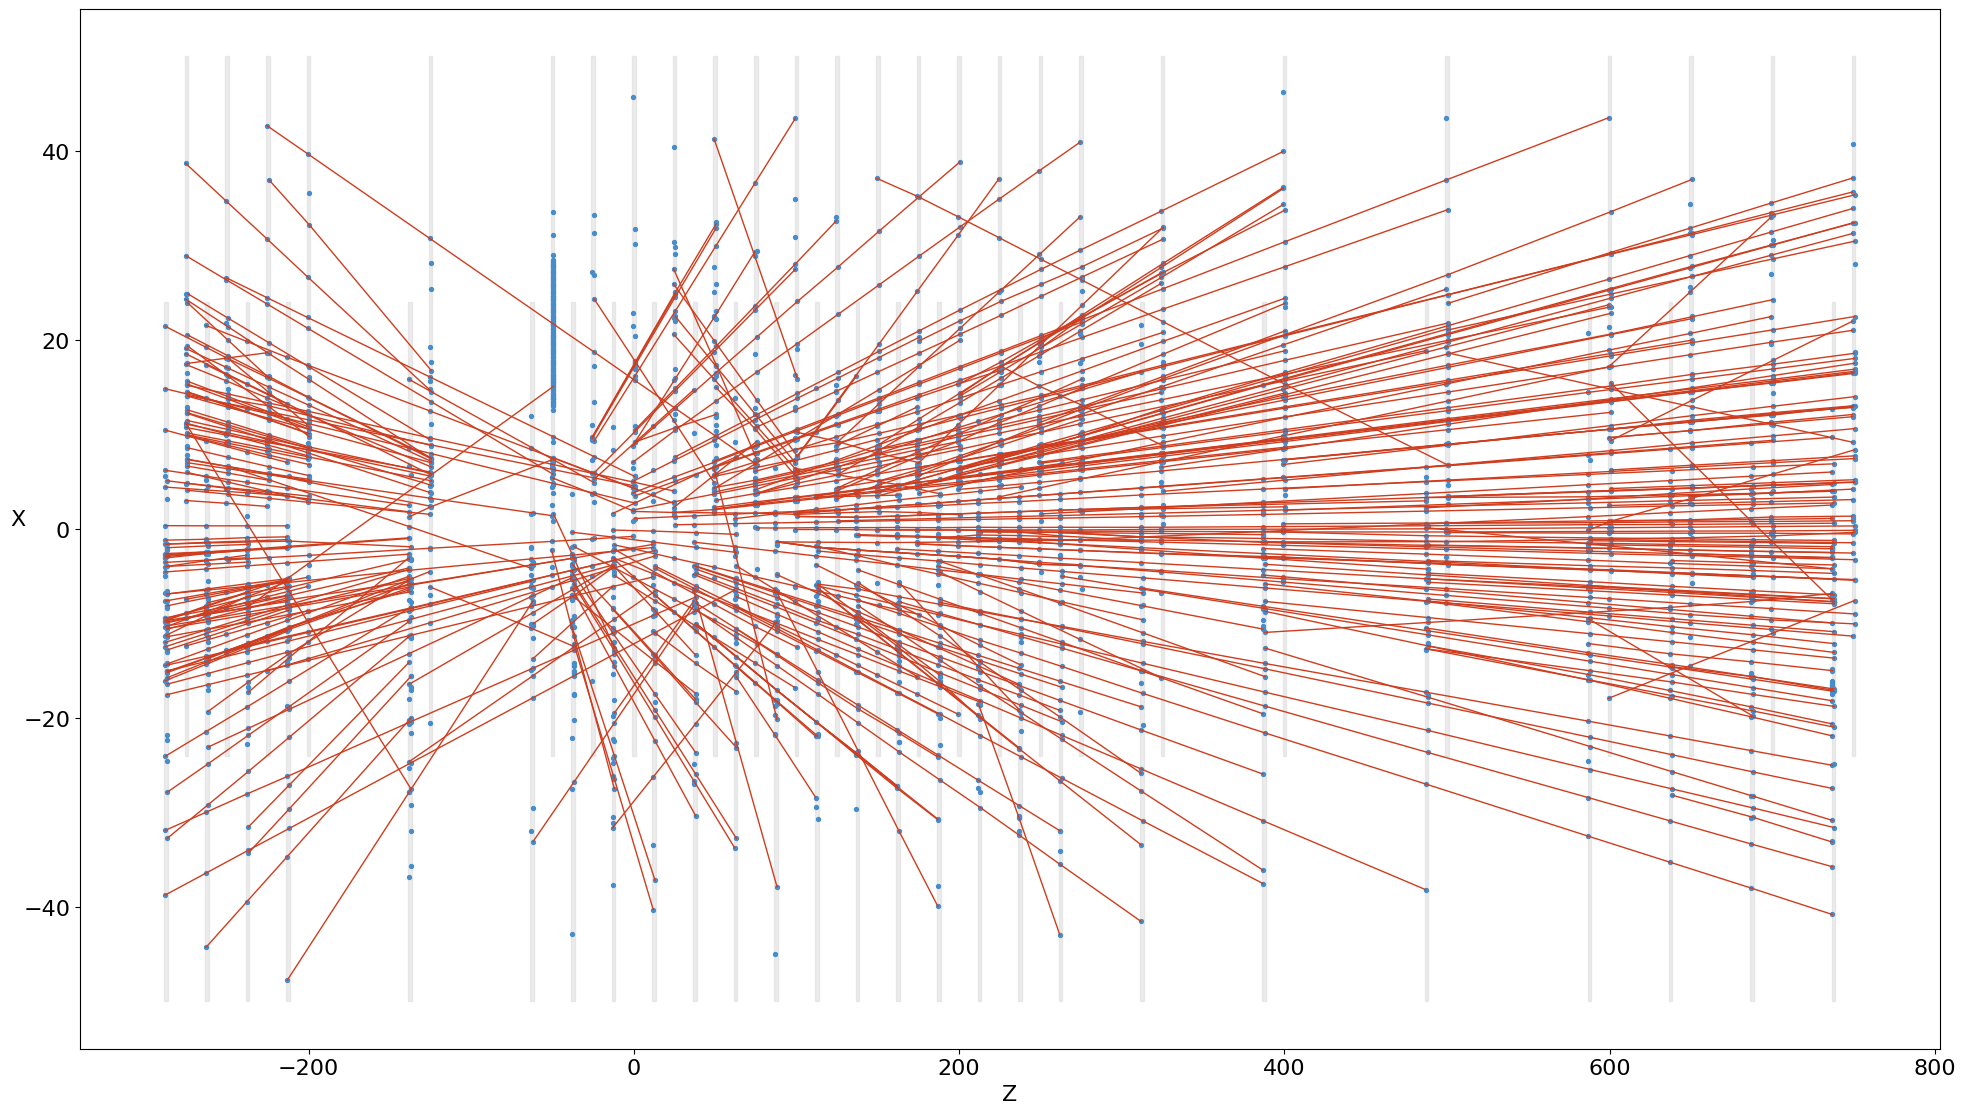

128 tracks including        8 ghosts (  6.2%). Event average   6.2%
              velo :      104 from      106 ( 98.1%,  98.1%)        3 clones (  2.88%), purity: ( 98.88%,  98.88%),  hitEff: ( 94.24%,  94.24%)
              long :       26 from       26 (100.0%, 100.0%)        1 clones (  3.85%), purity: ( 99.38%,  99.38%),  hitEff: ( 92.96%,  92.96%)
         long>5GeV :       17 from       17 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: ( 97.65%,  97.65%)


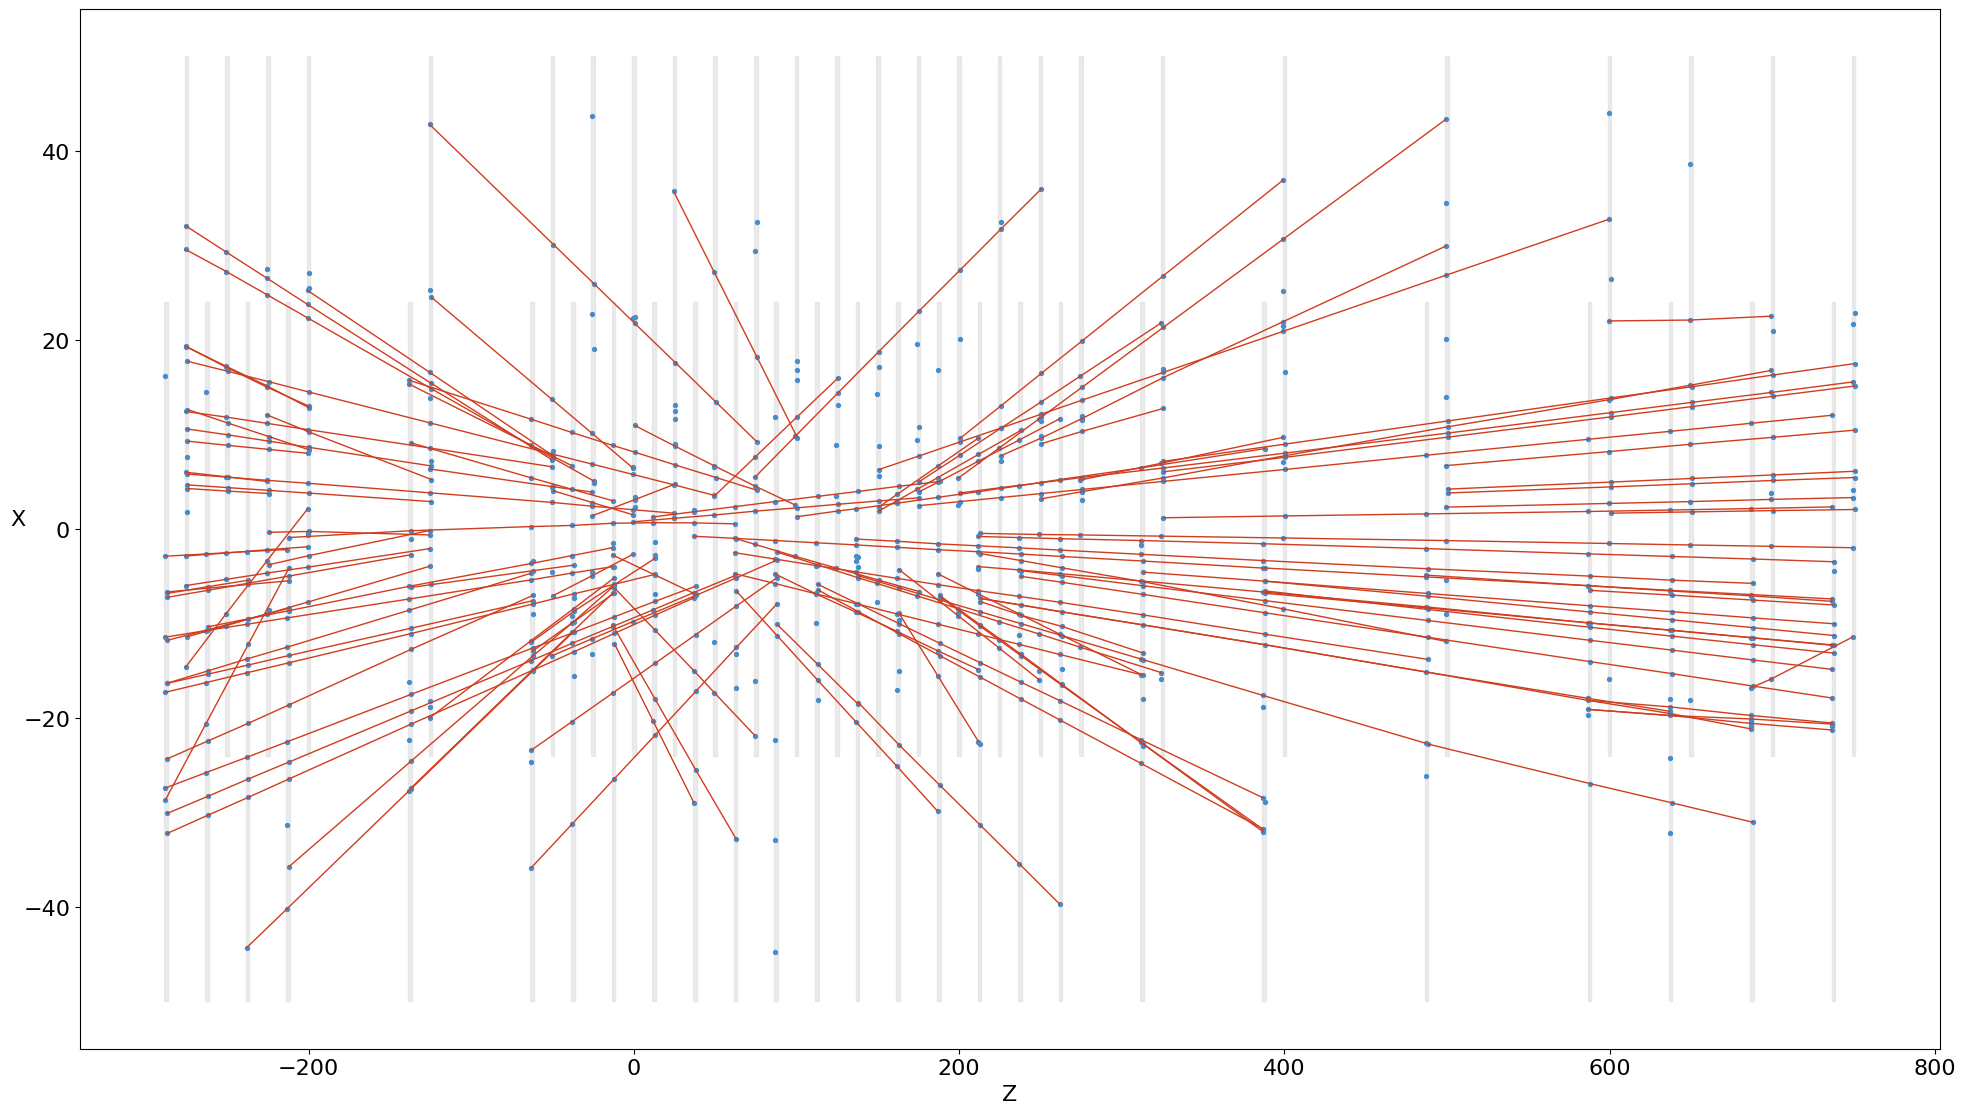

96 tracks including        3 ghosts (  3.1%). Event average   3.1%
              velo :       74 from       75 ( 98.7%,  98.7%)        5 clones (  6.76%), purity: ( 98.18%,  98.18%),  hitEff: ( 89.89%,  89.89%)
              long :       24 from       24 (100.0%, 100.0%)        3 clones ( 12.50%), purity: ( 99.22%,  99.22%),  hitEff: ( 87.38%,  87.38%)
         long>5GeV :       13 from       13 (100.0%, 100.0%)        2 clones ( 15.38%), purity: ( 99.26%,  99.26%),  hitEff: ( 85.64%,  85.64%)
      long_strange :        2 from        2 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
 long_strange>5GeV :        1 from        1 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
        long_fromb :        4 from        4 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
   long_fromb>5GeV :        1 from        1 (100.0%, 100.0%)        0

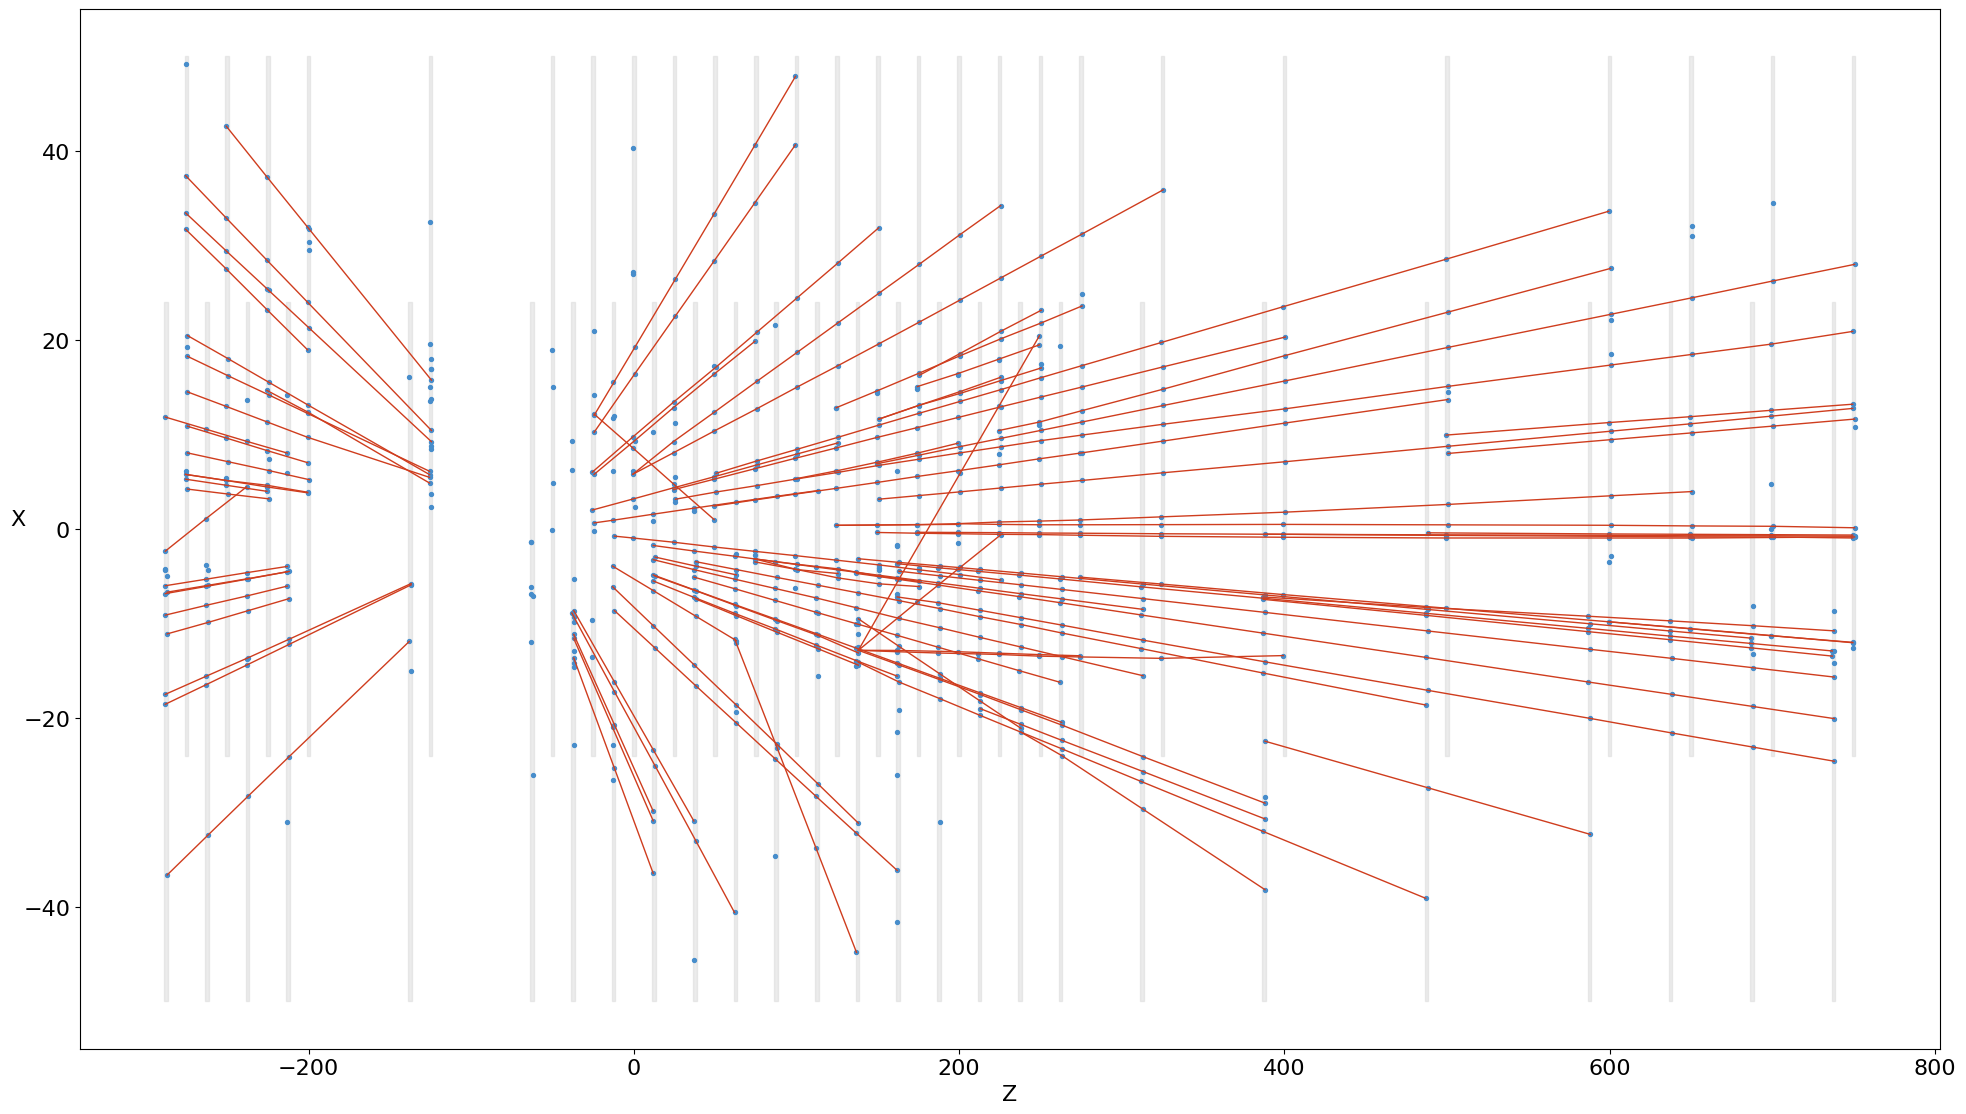

435 tracks including       53 ghosts ( 12.2%). Event average  12.2%
              velo :      330 from      378 ( 87.3%,  87.3%)        9 clones (  2.73%), purity: ( 97.65%,  97.65%),  hitEff: ( 93.64%,  93.64%)
              long :       97 from       99 ( 98.0%,  98.0%)        5 clones (  5.15%), purity: ( 98.16%,  98.16%),  hitEff: ( 93.80%,  93.80%)
         long>5GeV :       59 from       60 ( 98.3%,  98.3%)        4 clones (  6.78%), purity: ( 97.96%,  97.96%),  hitEff: ( 92.66%,  92.66%)
      long_strange :        2 from        2 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)
 long_strange>5GeV :        1 from        1 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)


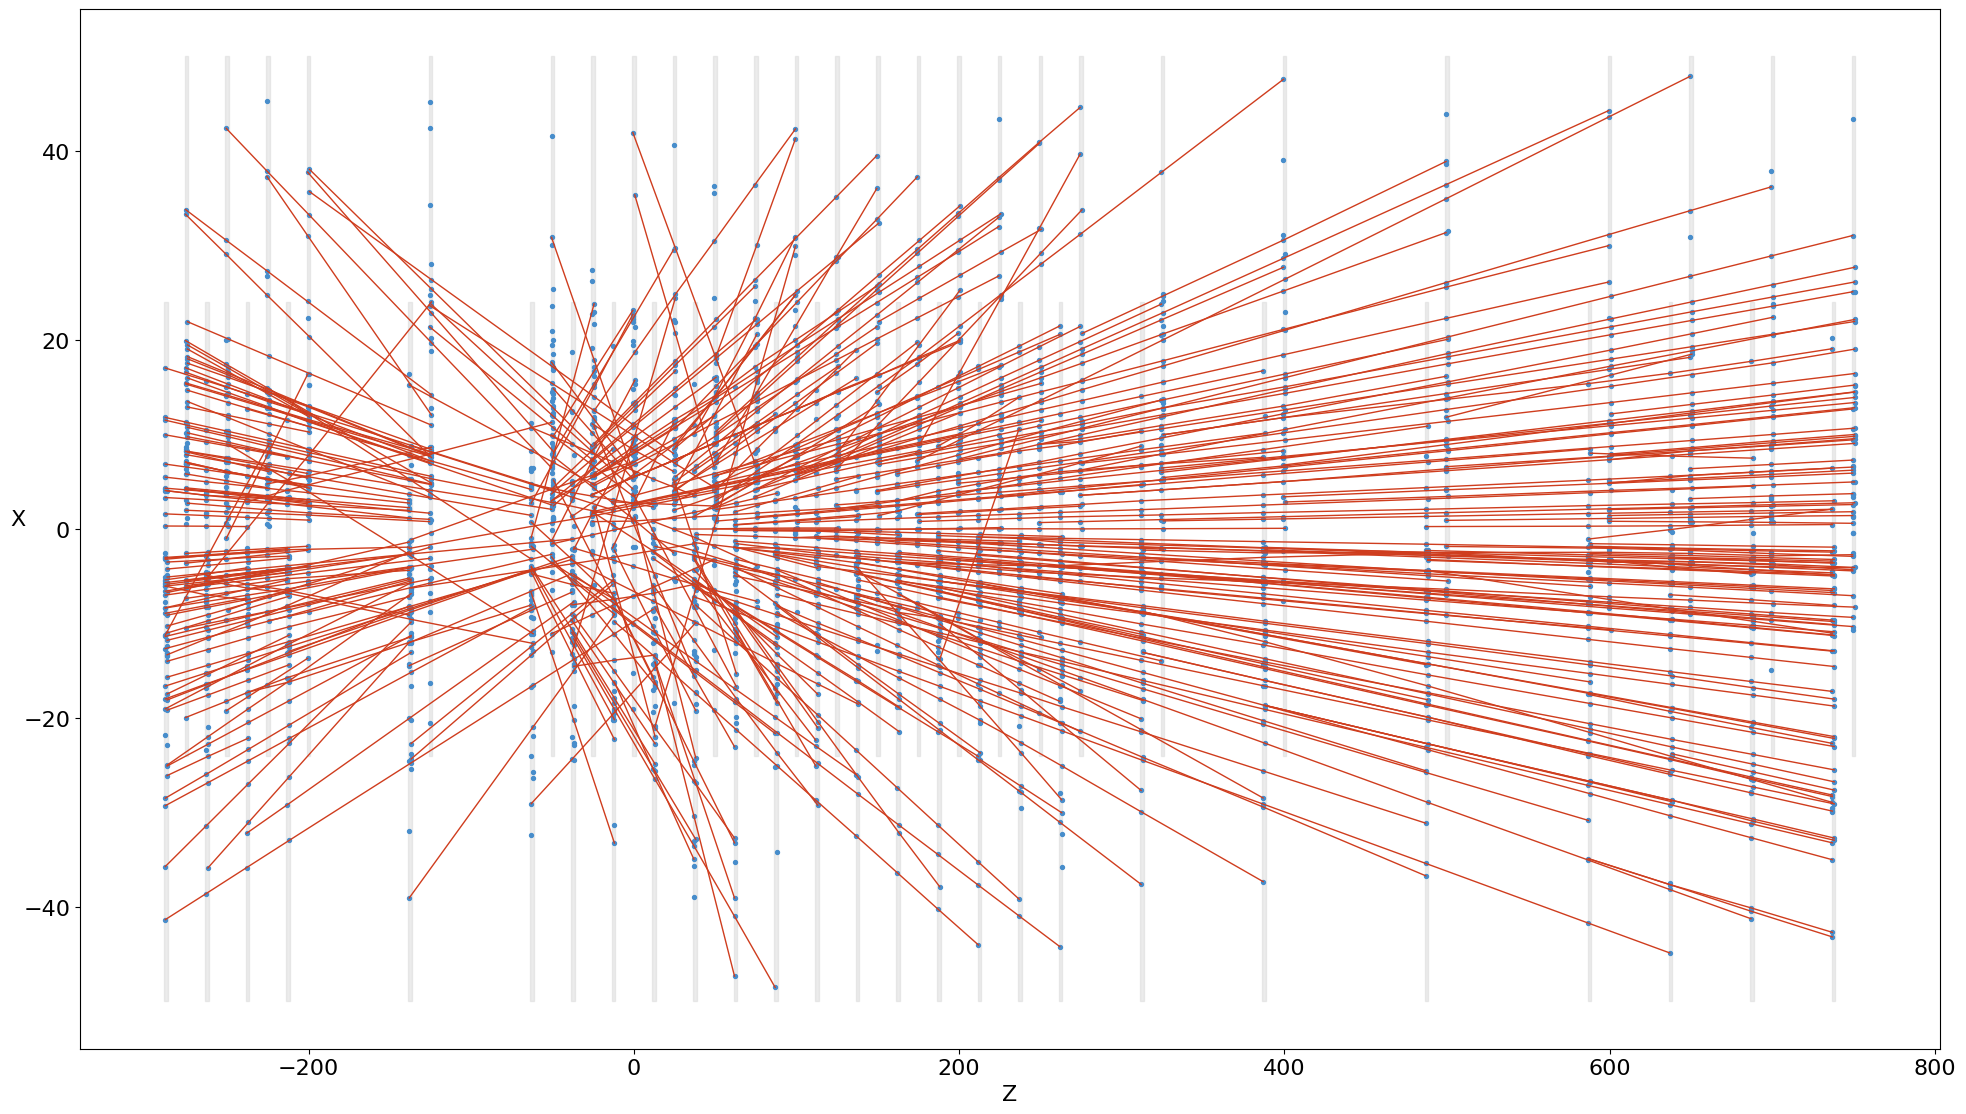

2759 tracks including      273 ghosts (  9.9%). Event average   8.5%
              velo :     2181 from     2377 ( 91.8%,  93.0%)       52 clones (  2.38%), purity: ( 98.07%,  98.20%),  hitEff: ( 94.46%,  94.58%)
              long :      640 from      654 ( 97.9%,  98.5%)       27 clones (  4.22%), purity: ( 98.34%,  98.72%),  hitEff: ( 93.95%,  94.04%)
         long>5GeV :      391 from      401 ( 97.5%,  98.4%)       20 clones (  5.12%), purity: ( 98.10%,  98.68%),  hitEff: ( 94.25%,  93.20%)
      long_strange :       24 from       26 ( 92.3%,  93.7%)        0 clones (  0.00%), purity: ( 97.80%,  96.96%),  hitEff: ( 95.15%,  97.02%)
 long_strange>5GeV :       10 from       11 ( 90.9%,  91.5%)        0 clones (  0.00%), purity: ( 99.00%,  99.33%),  hitEff: ( 94.81%,  95.07%)
        long_fromb :        9 from        9 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: ( 98.57%,  98.41%)
   long_fromb>5GeV :        4 from        4 (100.0%, 100.0%)       

In [12]:
all_events = []

for i in range(10):
    f = open(f"velopix_tracking/events/velo_event_{i}.json")
    json_data = json.loads(f.read())
    event = em.event(json_data)
    f.close()
    tracks = track_following.solve(event)
    all_events.append((json_data, tracks))
    vl.validate_print([json_data], [tracks])
    try:
        print_event_2d(event, tracks=tracks)
    except ValueError:
        print("Plot not possible")

all_json = [element[0] for element in all_events]
all_tracks = [element[1] for element in all_events]
vl.validate_print(all_json, all_tracks)

The fake rate is a big higher than expected. It could be that some of the tracks with less hits are incorrect.

* Remove all tracks with 3 hits and run the validator. Do the results improve? What are the tradeoffs?

Exercise 4
---------------

If you still have energy in you, with everything you have learned you have now the tools to attempt creating your own track reconstruction algorithm.

We will first need a function to determine whether a track looks good or bad. One such function is the *means squared error*:

* Create a means_squared_error method that gets a track as an input and calculates the MSE (https://en.wikipedia.org/wiki/Mean_squared_error) of a track.

Now that you have a function to qualify how good a track is *you are in business*. A rough approximation at a tracking in the VELO is as follows:

1. Iterate over 3 modules until you find a *triplet* of hits whose MSE is under a threshold.
2. Extrapolate those hits to the remaining modules until you find no compatible hits with the MSE method in a module.

Implement such a tracking algorithm, and have fun playing around with the data!